In [2]:
#Si richiede di verificare le dimensioni del dataset e i relativi metadati 
#Si chiede di trovare, per ogni continente: 
# a. il numero di casi fin dall'inizio della pandemia 
# b. la percentuale rispetto al totale mondiale del numero di casi 
#Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati: 
# a. l'evoluzione del casi totali dall'inizio alla fine dell'anno 
# b. il numero di nuovi casi rispetto alla data; poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni 
#Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso) 
# a. scrivere un breve commento a riguardo 
#Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023: 
# a. mostrare la somma dei pazienti ospitalizzati per ognuna 
# b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [3]:
import numpy as np
import sqlalchemy
import pandas as pd

In [4]:
ep=pd.read_csv("C:/Users/Marco/Desktop/Epicode/Python/owid-covid-data.csv")

In [5]:
ep

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN


In [6]:
dimensioni_dataset=ep.shape
dimensioni_dataset

(429435, 67)

In [7]:
metadati = list(ep.columns)
metadati

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [8]:
casi_continente=ep.groupby("continent")["total_cases"].max() #il numero di casi fin dall'inizio della pandemia

In [9]:
print(casi_continente)

continent
Africa             4072765.0
Asia              99373219.0
Europe            38997490.0
North America    103436829.0
Oceania           11861161.0
South America     37511921.0
Name: total_cases, dtype: float64


In [10]:
casi_mondo=casi_continente.sum()
casi_mondo

295253385.0

In [115]:
Percentuale_casi_Continent=round(((casi_continente/casi_mondo)*100),2) #la percentuale rispetto al totale mondiale del numero di casi 
Percentuale_casi_Continent

continent
Africa            1.38
Asia             33.66
Europe           13.21
North America    35.03
Oceania           4.02
South America    12.70
Name: total_cases, dtype: float64

In [28]:
type(ep["date"]) #interrogo la colonna "date" per sapere che tipo è. se non è di tipo "datatime" lo converto.

pandas.core.series.Series

In [13]:
ep["date"]=pd.to_datetime(ep["date"]) #conversione in datetime

In [14]:
filtro_it_2022=ep[(ep["location"]=="Italy")&(ep["date"].dt.year==2022)] #Selezionare i dati relativi all'Italia nel 2022

In [15]:
#grafico per l'evoluzione del casi totali dall'inizio alla fine dell'anno 2022

In [16]:
import seaborn as sns

[Text(0.5, 0, 'DATA'),
 Text(0, 0.5, 'Numero di casi'),
 Text(0.5, 1.0, 'Evoluzione casi in ITALIA anno 2022')]

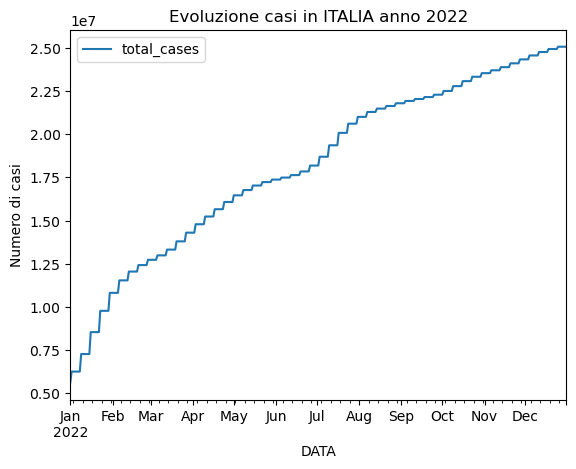

In [17]:
grafico=filtro_it_2022.plot(x="date" , y="total_cases")
grafico.set(xlabel="DATA",ylabel="Numero di casi", title= "Evoluzione casi in ITALIA anno 2022")

In [18]:
#il numero di nuovi casi rispetto alla data; 
#poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

In [19]:
ep.dropna(subset=["new_cases"])

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN


[Text(0.5, 0, 'DATA'),
 Text(0, 0.5, 'Numero di nuovi casi'),
 Text(0.5, 1.0, 'Evoluzione casi in ITALIA anno 2022')]

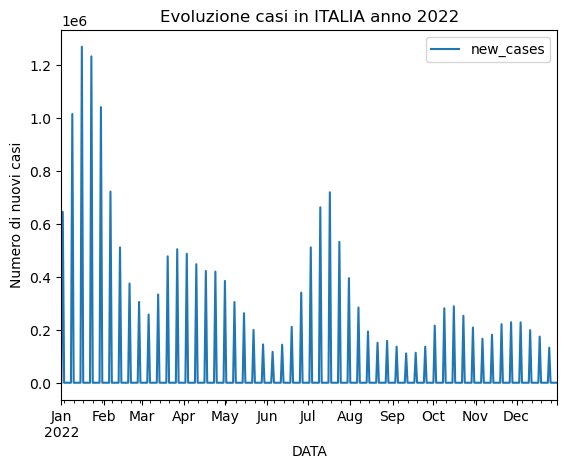

In [20]:
grafico=filtro_it_2022.plot(x="date" , y="new_cases")
grafico.set(xlabel="DATA",ylabel="Numero di nuovi casi", title= "Evoluzione casi in ITALIA anno 2022")

In [21]:
#Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot
#la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso) 

In [22]:
ep.dropna(subset=["icu_patients"]) #elimino eventuali dati nulli

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
5216,DZA,Africa,Algeria,2020-07-17,18712.0,0.0,458.86,992.0,0.0,8.29,...,30.4,83.74,1.9,76.88,0.75,44903228,NaN,NaN,NaN,NaN
5217,DZA,Africa,Algeria,2020-07-18,18712.0,0.0,458.86,992.0,0.0,8.29,...,30.4,83.74,1.9,76.88,0.75,44903228,NaN,NaN,NaN,NaN
5219,DZA,Africa,Algeria,2020-07-20,22549.0,0.0,548.14,1056.0,0.0,9.14,...,30.4,83.74,1.9,76.88,0.75,44903228,NaN,NaN,NaN,NaN
5220,DZA,Africa,Algeria,2020-07-21,22549.0,0.0,548.14,1056.0,0.0,9.14,...,30.4,83.74,1.9,76.88,0.75,44903228,NaN,NaN,NaN,NaN
5221,DZA,Africa,Algeria,2020-07-22,22549.0,0.0,548.14,1056.0,0.0,9.14,...,30.4,83.74,1.9,76.88,0.75,44903228,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421049,OWID_WLS,Europe,Wales,2023-07-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN
421050,OWID_WLS,Europe,Wales,2023-07-09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN
421051,OWID_WLS,Europe,Wales,2023-07-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN
421052,OWID_WLS,Europe,Wales,2023-07-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN


In [32]:
ep["date"].dtype

dtype('<M8[ns]')

In [54]:
df=ep[ep["location"].isin(["Italy","Germany","France"])&(ep["date"]>=pd.to_datetime("2022-05-01"))&(ep["date"]<=pd.to_datetime("2023-04-30"))]

In [56]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131214,FRA,Europe,France,2022-05-01,27742592.0,376510.0,53787.14,146744.0,867.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,89536.72,6.19,6.24,1385.45
131215,FRA,Europe,France,2022-05-02,27742592.0,0.0,53787.14,146744.0,0.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
131216,FRA,Europe,France,2022-05-03,27742592.0,0.0,53787.14,146744.0,0.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
131217,FRA,Europe,France,2022-05-04,27742592.0,0.0,53787.14,146744.0,0.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
131218,FRA,Europe,France,2022-05-05,27742592.0,0.0,53787.14,146744.0,0.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186482,ITA,Europe,Italy,2023-04-26,25772459.0,0.0,3808.43,189627.0,0.0,26.71,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186483,ITA,Europe,Italy,2023-04-27,25772459.0,0.0,3808.43,189627.0,0.0,26.71,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186484,ITA,Europe,Italy,2023-04-28,25772459.0,0.0,3808.43,189627.0,0.0,26.71,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186485,ITA,Europe,Italy,2023-04-29,25772459.0,0.0,3808.43,189627.0,0.0,26.71,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN


In [60]:
df.dropna(subset="icu_patients")

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131214,FRA,Europe,France,2022-05-01,27742592.0,376510.0,53787.14,146744.0,867.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,89536.72,6.19,6.24,1385.45
131215,FRA,Europe,France,2022-05-02,27742592.0,0.0,53787.14,146744.0,0.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
131216,FRA,Europe,France,2022-05-03,27742592.0,0.0,53787.14,146744.0,0.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
131217,FRA,Europe,France,2022-05-04,27742592.0,0.0,53787.14,146744.0,0.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
131218,FRA,Europe,France,2022-05-05,27742592.0,0.0,53787.14,146744.0,0.0,123.86,...,35.6,NaN,5.98,82.66,0.90,67813000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186482,ITA,Europe,Italy,2023-04-26,25772459.0,0.0,3808.43,189627.0,0.0,26.71,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186483,ITA,Europe,Italy,2023-04-27,25772459.0,0.0,3808.43,189627.0,0.0,26.71,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186484,ITA,Europe,Italy,2023-04-28,25772459.0,0.0,3808.43,189627.0,0.0,26.71,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN
186485,ITA,Europe,Italy,2023-04-29,25772459.0,0.0,3808.43,189627.0,0.0,26.71,...,27.8,NaN,3.18,83.51,0.89,59037472,NaN,NaN,NaN,NaN


C:\Users\Marco\AppData\Local\Temp\ipykernel_12296\3264533024.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico=sns.boxplot(data=df,x="location",y="icu_patients",palette="Set2")


[Text(0.5, 0, 'Stati'),
 Text(0, 0.5, 'Pazienti terapia intensiva'),
 Text(0.5, 1.0, 'Evoluzione casi in ITALIA anno 2022')]

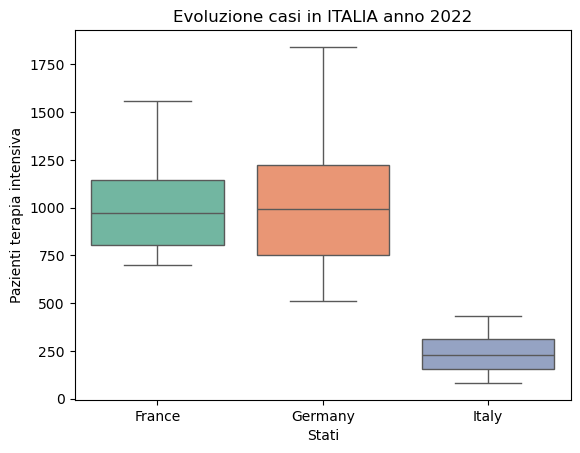

In [108]:
grafico=sns.boxplot(data=df,x="location",y="icu_patients",palette="Set2")
grafico.set(xlabel="Stati",ylabel="Pazienti terapia intensiva", title= "Evoluzione casi in ITALIA anno 2022")

In [ ]:
# scrivere un breve commento a riguardo:
#Da questo grafico, possiamo osservare come l'Italia durante tutto il 2022 sia riuscita a contenere maggiormente l'epidemia rispetto a Francia e Germania.
#La Germania ha avuto il picco massimo rispetto agli altri 2 paesi; si potrebbe mettere a confronto anche il numero di contagiati rispetto alla popolazione per capire la percentuale di persone contagiate per nazione per 
#poter capire meglio la veridicità del grafico appena osservato. 

In [ ]:
#Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023: 
#mostrare la somma dei pazienti ospitalizzati per ognuna

In [102]:
df_ricoverati=ep[(ep["location"].isin(["Italy","Germany","France","Spain"]))&(ep["date"].dt.year==2023)]
df_ricoverati_tot=df_ricoverati.groupby("location")["hosp_patients"].sum()
df_ricoverati_tot

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

In [104]:
df_ricoverati_tot.dropna

<bound method Series.dropna of location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64>

In [113]:
#se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

df_ricoverati["hosp_patients"].isnull().sum() #cerco dati nulli all'interno della colonna ossarvata

843

In [ ]:
#La presenza di valori nulli all'interno della colonna "hosp_patiens", potrebbe essere stata causata 
#da una mancata raccolta o semplicemente non sono stati inseriti per distrazione.
#Sì può comunque non tenerne conto dato il numero così basso, ma non si possono eliminare poichè si 
#potrebbero perdere righe con all'interno dati utili.